In [38]:
import numpy as np
# import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Setup & Import

In [39]:
following_relationships = pd.read_csv('../../data/raw/Following_Ignoring_Relationships_01052019_31052019.csv', sep=';')

In [40]:
following_relationships.head()

ID_CommunityIdentity  ID_CommunityIdentityConnectedTo  \
0                  1778                           246490   
1                  5872                             5872   
2                  9030                            23875   
3                  9030                           508504   
4                 10569                            10569   

   ID_CommunityConnectionType  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

In [41]:
following_relationships.ID_CommunityConnectionType.value_counts()

ID_CommunityConnectionType
1    57117
2    29659
Name: count, dtype: int64

Rename the columns for convenience

In [42]:
following_relationships.columns = ["user_id", "follows_user_id", "follows"]

In [43]:
following_relationships.isnull().sum() / following_relationships.isnull().count()

user_id            0.0
follows_user_id    0.0
follows            0.0
dtype: float64

No missing values which is nice

Ignore the blocked_user columns and drop it because it will not contain any information

In [44]:
following_relationships = following_relationships[following_relationships['follows'] == 1]
following_relationships = following_relationships.drop(columns=['follows'])

In [45]:
following_relationships.head()

user_id  follows_user_id
0     1778           246490
1     5872             5872
2     9030            23875
3     9030           508504
4    10569            10569

# Sample

In [52]:
following_relationships_sample = following_relationships.sample(n=5000)

# Create Graph

In [53]:
import networkx as nx

In [54]:
G = nx.from_pandas_edgelist(following_relationships_sample,
                            source='user_id',
                            target='follows_user_id',
                            create_using=nx.Graph())

In [55]:
# Number of nodes
num_nodes = len(G.nodes)

# Number of edges
num_edges = len(G.edges)

# Other information you might want
average_degree = sum(dict(G.degree()).values()) / num_nodes
clustering_coefficient = nx.average_clustering(G)

# Print the information
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree}")
print(f"Average clustering coefficient: {clustering_coefficient}")

Number of nodes: 4560
Number of edges: 4949
Average degree: 2.1706140350877194
Average clustering coefficient: 0.006616738975878063


In [56]:
nx.degree_assortativity_coefficient(G)

-0.055315764547622985

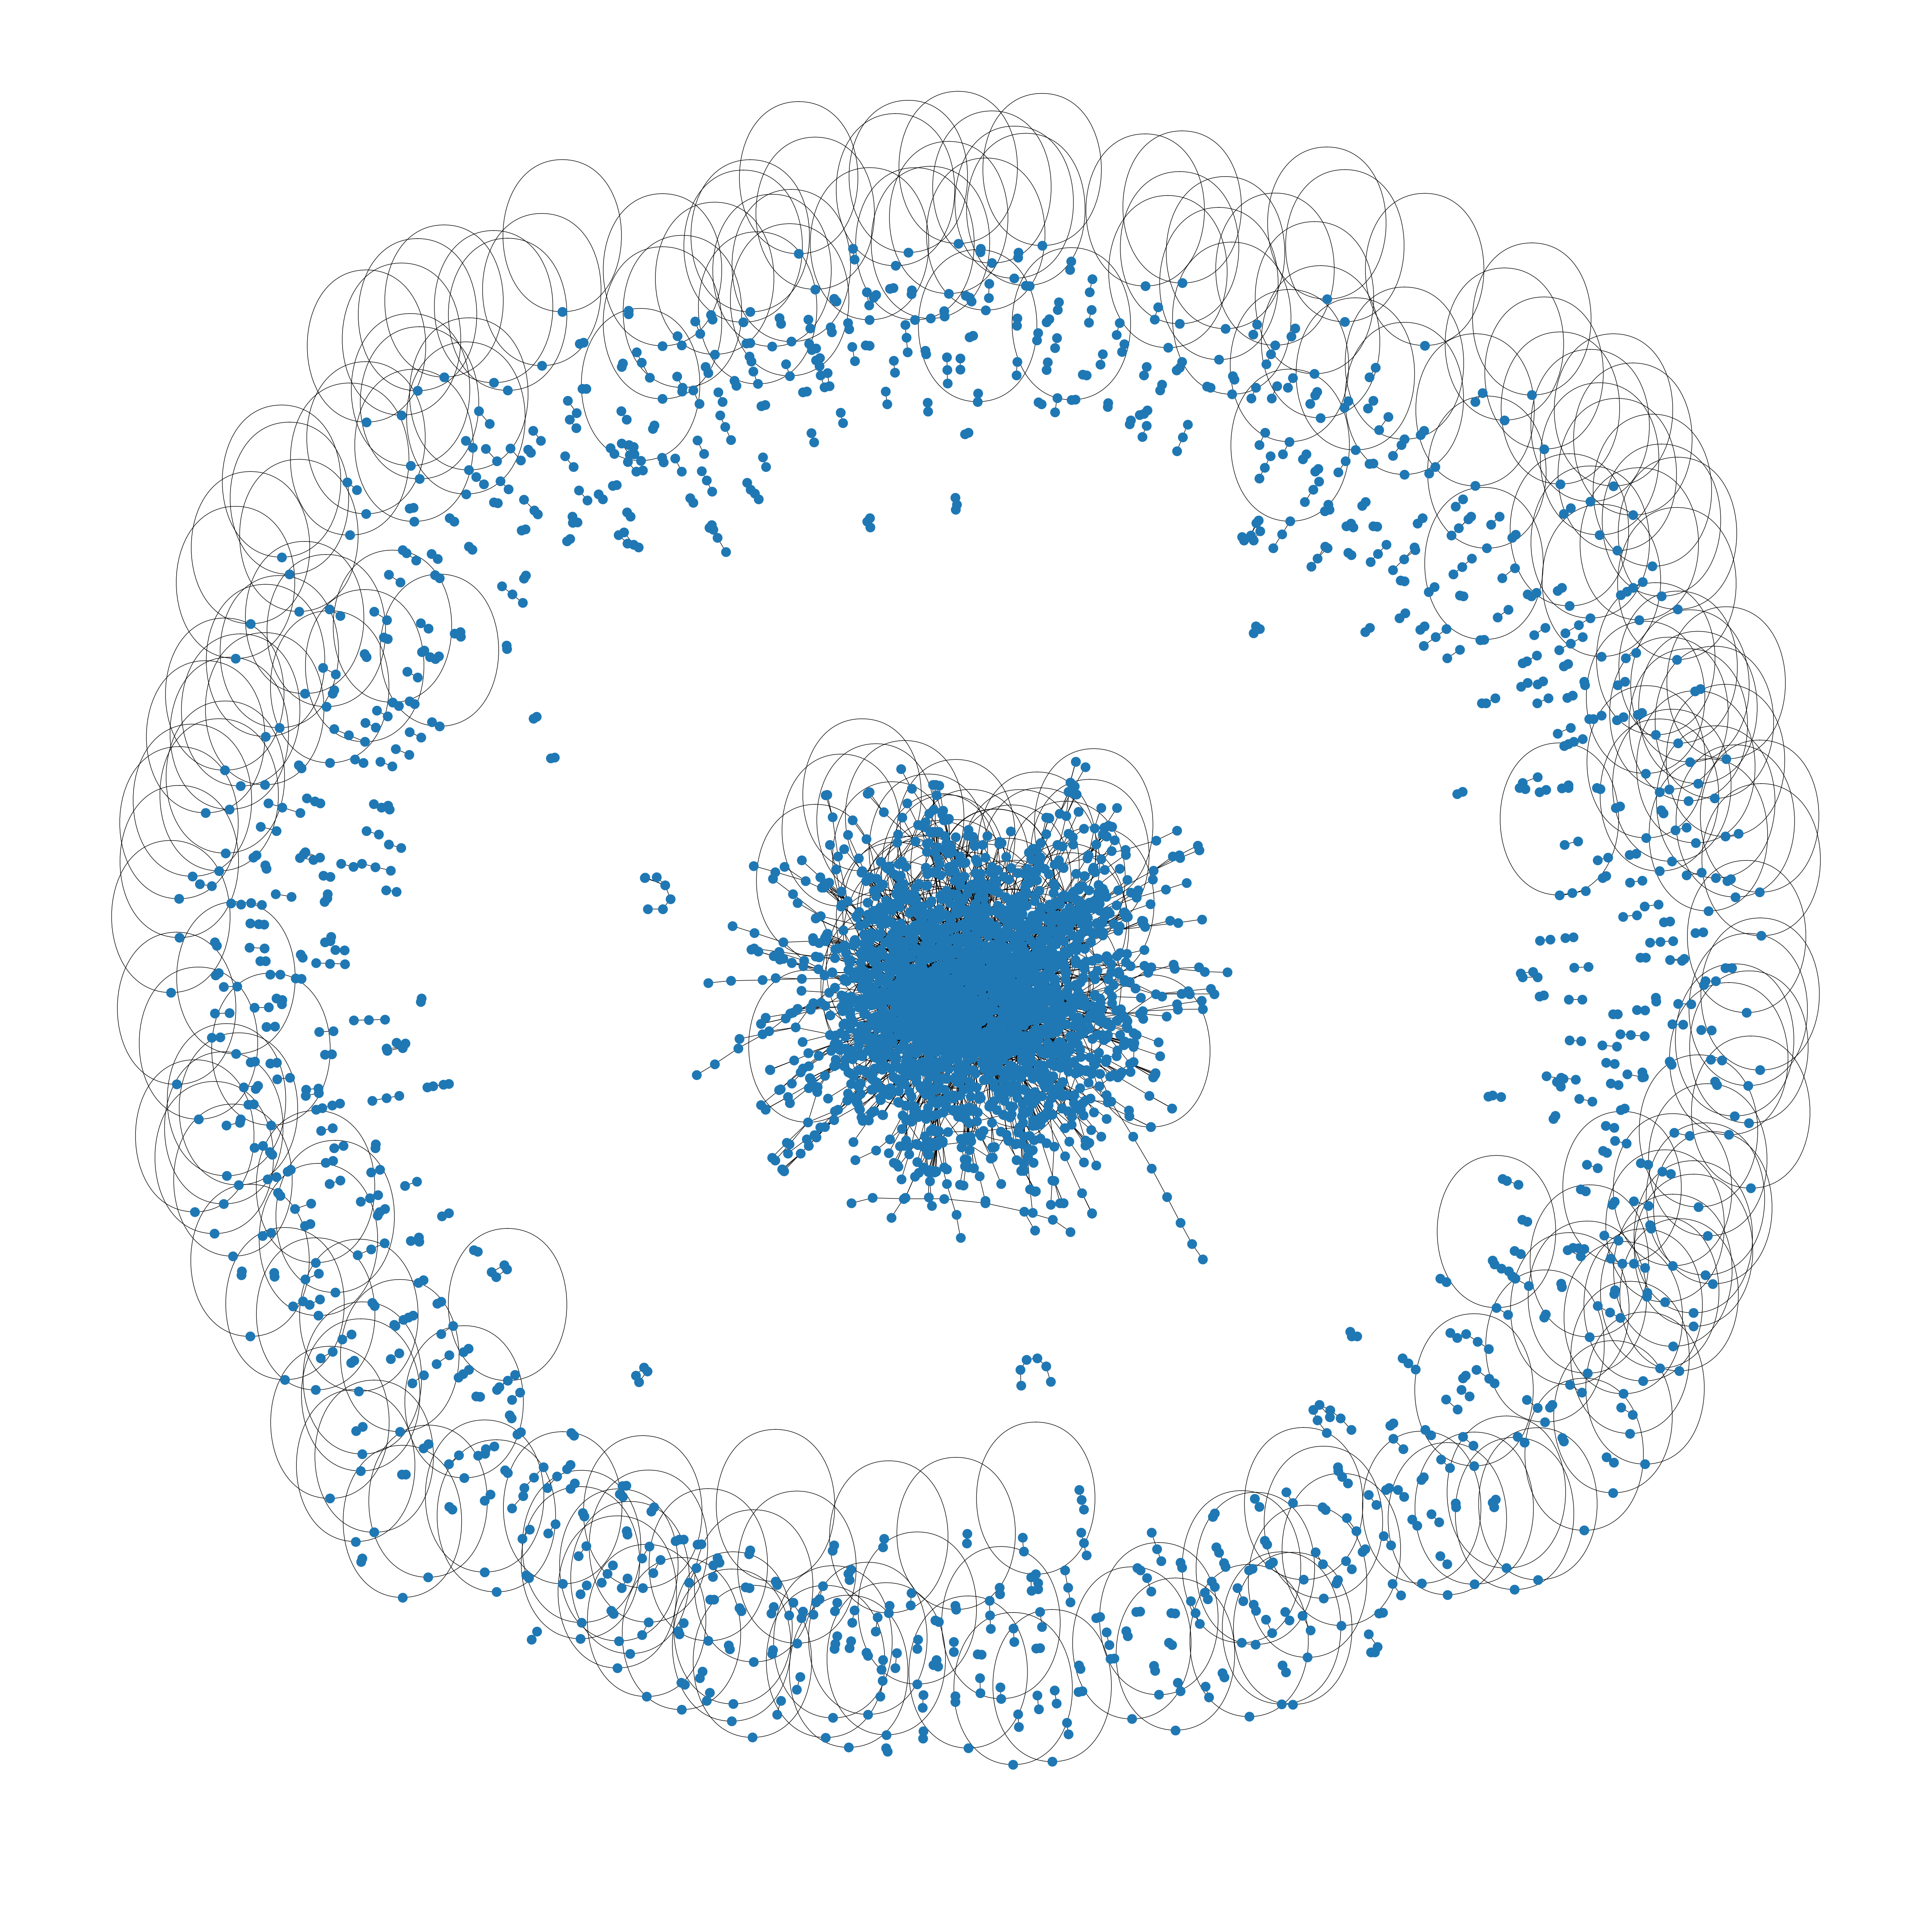

In [57]:
fig = plt.figure(figsize=(50,50))
nx.draw_spring(G)
plt.show()

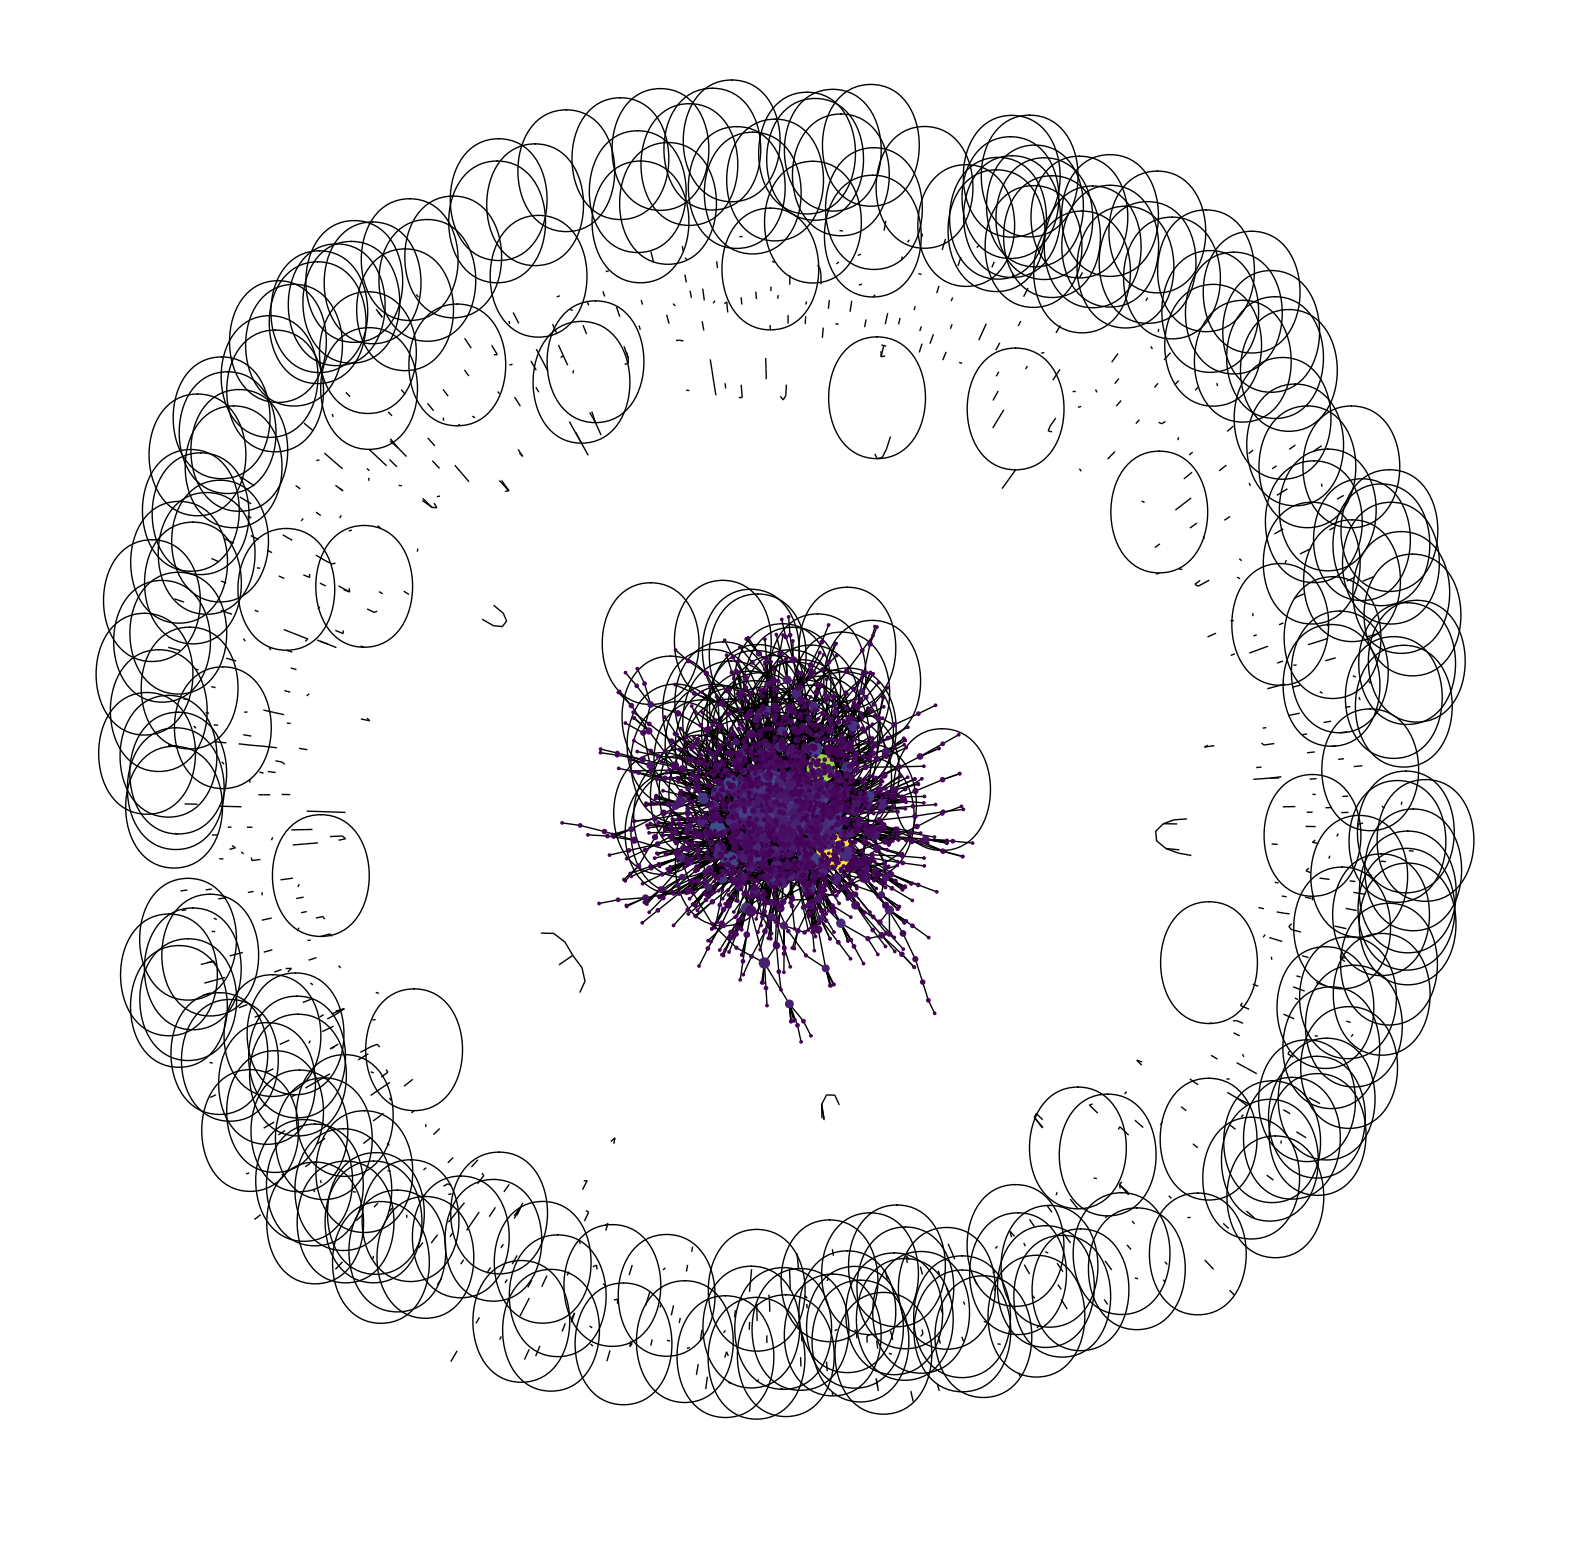

In [58]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.savefig("G_fb.png", format="PNG")
plt.show()